In [4]:
import os, sys
import colorsys
import random
import matplotlib.pyplot as plt
import numpy as np
from ugscnn.loader import S2D3DSegLoader
from cnns.loader import SemSegLoader

from imageio import imread

In [5]:
def apply_mask(image, label, colors):
    N = len(colors)
    for i in range(N):
        index = (label==i)
        image[index] = colors[i]
    return image

def show_mask(image, label, colors):
    image = apply_mask(image, label, colors)
    show(image)
    
def random_colors(N, bright=True):
    """
    Generate random colors.
    To get visually distinct colors, generate them in HSV space then
    convert to RGB.
    """
    brightness = 1.0 if bright else 0.7
    hsv = [(i / N, 1, brightness) for i in range(N)]
    colors = list(map(lambda c: colorsys.hsv_to_rgb(*c), hsv))
    random.shuffle(colors)
    return colors

def show(image):
    plt.figure(figsize=(12,8))
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [6]:
data_folder="data/2d3ds_sphere/"
fold=1
max_level=5
in_ch = "rgbd"

In [12]:
testset = S2D3DSegLoader(data_folder, "test", fold=fold, sp_level=max_level, in_ch=len(in_ch))
rgbd = testset[0][0]
mask = testset[0][1]
rgbd.shape, mask.shape

((4, 10242), (10242,))

In [13]:
np.unique(mask)

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14])

# 2d3ds
Original dataset

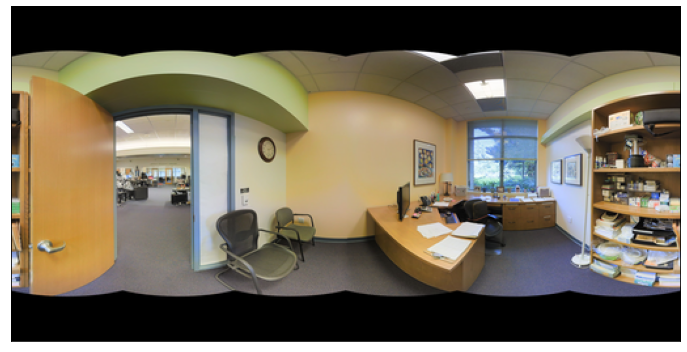

In [131]:
rgbpath = "data/2d3ds_pano_small/area_1/rgb/camera_0004591bfdc749a88db196a5d8b345cb_office_6_frame_equirectangular_domain_rgb.png"
maskpath = "data/2d3ds_pano_small/area_1/semantic/camera_0004591bfdc749a88db196a5d8b345cb_office_6_frame_equirectangular_domain_semantic.png"

rgb, mask = imread(rgbpath)[:,:,:3], imread(maskpath)
show(rgb)

The processed dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


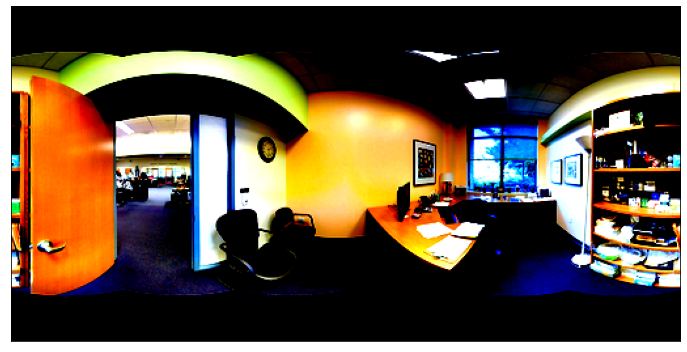

In [132]:
segloader = SemSegLoader(data_dir="data/2d3ds_pano_small/", partition="train", fold=1,)
rgb, mask = segloader[0][0], segloader[0][1]
rgb = np.einsum("ijk->jki", rgb)[:,:,:3]
show(rgb)

In [14]:
np.unique(mask)

array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 14])

In [135]:
N = 13
colors = random_colors(N)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


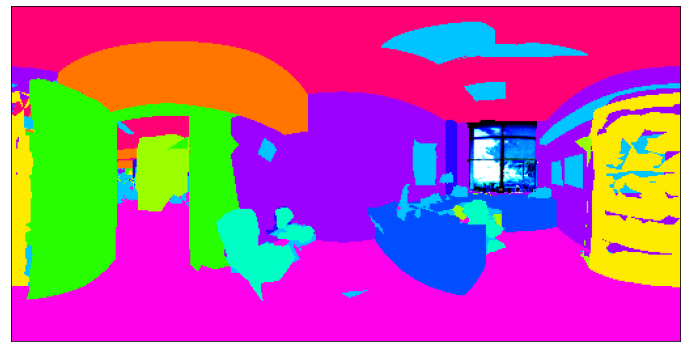

In [136]:
show_mask(rgb, mask, colors)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 1152x648 with 0 Axes>

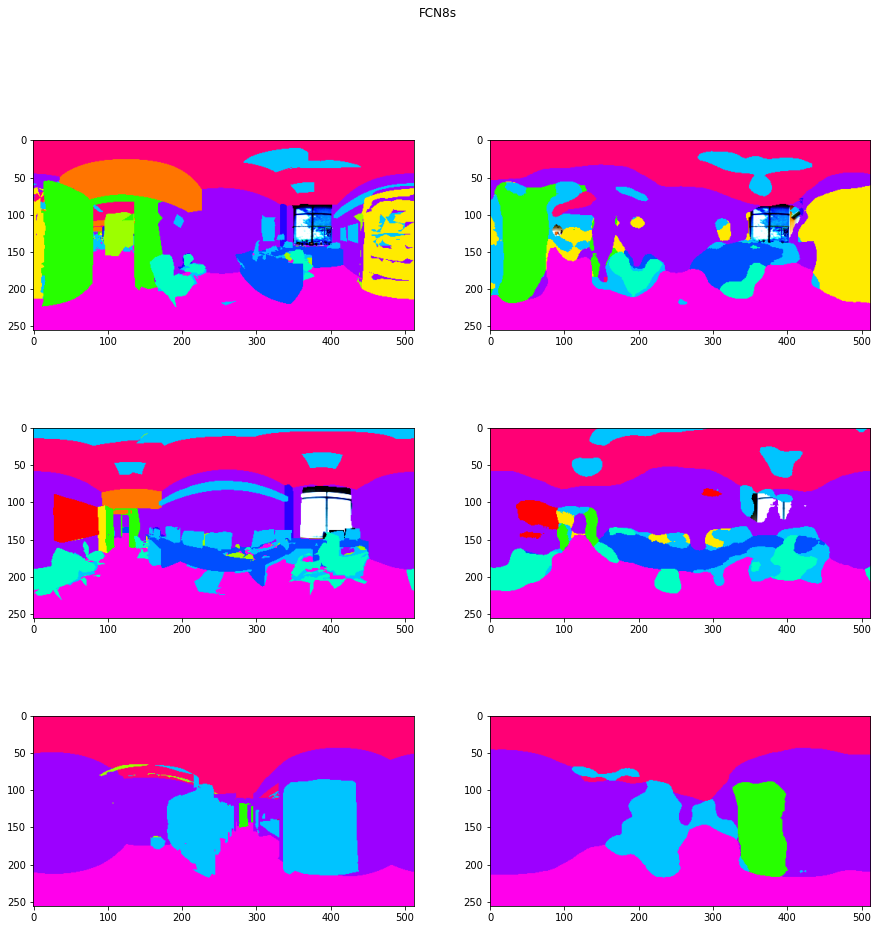

In [163]:
samples = np.load("cnns/samples.npz")

def show_result(samples, Nsamples = 3, title=None):
    plt.figure(figsize=(16,9))
    fig, axs = plt.subplots(Nsamples, 2)
    fig.suptitle(title)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    for i in range(Nsamples):
        image = samples["data"][i]
        image = np.einsum("ijk->jki", image)[:,:,:3]
        mask = samples["labels"][i]
        predict = samples["predict"][i]
        ground_truth = apply_mask(image.copy(), mask, colors)
        predict_label = apply_mask(image.copy(), predict, colors)
        
        axs[i,0].imshow(ground_truth)
        axs[i,1].imshow(predict_label)
    plt.show()
show_result(samples, title="FCN8s")